In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv("downloads/apps/playst1.csv")
data2 = pd.read_csv("downloads/apps/playst2.csv")

In [3]:
data1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# cleaning and molding data according to our needs

In [19]:
data2 =data2.drop_duplicates()

data2.Installs = data2.Installs.str.replace("+","")    
data2.Installs = data2.Installs.str.replace(",","")    
data2.Installs.loc[data2.Installs =="Free"] = 0
data2.Installs = data2.Installs.astype("int64")


data2.Price =data2.Price.str.replace("$" ,"")
data2.Price =data2.Price.str.replace("Everyone" ,"0")
data2.Price =data2.Price.astype("float64")

months =["January","February","March","April","May" ,"June" ,"July","August","September","October","November","December"]
data2["Last Updated"]=data2["Last Updated"].str.replace(", " ,"/")
data2["Last Updated"]=data2["Last Updated"].str.replace(" " ,"/")

for i in range(len(months)):
    data2["Last Updated"]= data2["Last Updated"].str.replace(months[i] ,str(i+1))
        
data2["Last Updated"]=data2["Last Updated"].str.replace("1.0.19","1/10/2019")
data2["Last Updated"]=pd.to_datetime(data2["Last Updated"], format="%m/%d/%Y")


/var/folders/_2/8cjcwdq112z35lnq9zg_2zb80000gn/T/ipykernel_1308/233210853.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2.Installs = data2.Installs.str.replace("+","")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/_2/8cjcwdq112z35lnq9zg_2zb80000gn/T/ipykernel_1308/233210853.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when re

# Top Genres 

In [20]:
gen_vs_ins =data2.groupby("Genres").Installs.sum()
gen_vs_ins_top = gen_vs_ins.nlargest(20)

#### People spent most money on the following apps

In [21]:
notFree = data2.loc[data2.Price != 0].drop_duplicates()
notFree["Earning"] = data2.Price * data2.Installs 
notFree=notFree.drop_duplicates("App")

In [22]:
App_Earning =notFree.loc[notFree.Earning.nlargest(10).index ,["App", "Earning"]]

#### installs per catogery

In [23]:
cat_vs_installs=data2.groupby("Category").Installs.sum()
cat_vs_installs_top10 =data2.groupby("Category").Installs.sum().nlargest(10)

#### best Genre game (most downloaded) , highest points


In [24]:
game_Cat =data2.loc[data2.Category =="GAME"]
topGame_genre =game_Cat.groupby("Genres").Installs.sum().nlargest(20)

game_Cat.max().App

'► MultiCraft ― Free Miner! 👍'

####  best GenreCommunication(most downloaded)

In [25]:
comm_cat =data2.loc[data2.Category == "COMMUNICATION"]
comm_cat.max().App

'哈哈姆特不EY'

In [26]:
#data2.loc[data2.Reviews > data2.Reviews.mean() 
        

# Report

### Top 20 genre according to installs

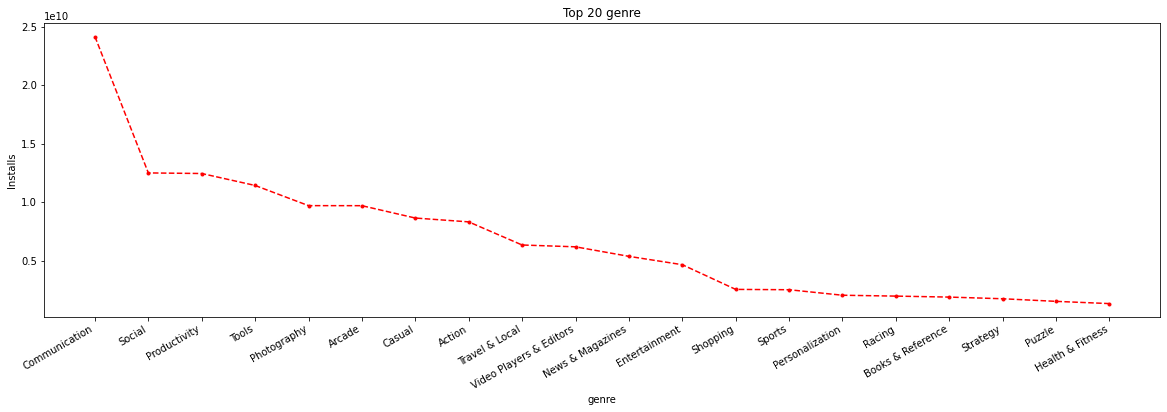

In [27]:
fig =plt.figure(figsize=(20,6))
plt.xlabel("genre" )
plt.ylabel("Installs")
plt.title("Top 20 genre")
plt.plot(gen_vs_ins_top.index ,gen_vs_ins_top.values ,"r.--")
fig.autofmt_xdate()

### Category vs installs

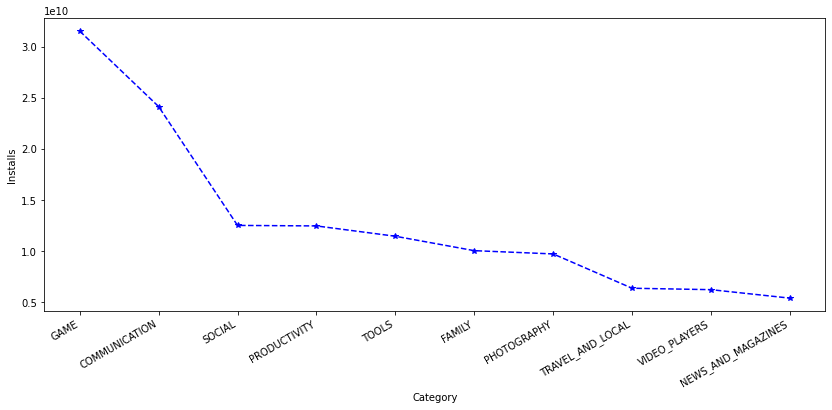

In [28]:
fig = plt.figure(figsize=(14,6))
plt.xlabel("Category")
plt.ylabel("Installs")
plt.plot(cat_vs_installs_top10.index ,cat_vs_installs_top10.values,"b*--")
fig.autofmt_xdate()

In [29]:
cat_vs_installs[:10]

Category
1.9                              0
ART_AND_DESIGN           124338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1916469576
BUSINESS                 863664865
COMICS                    56086150
COMMUNICATION          24152276251
DATING                   206536107
EDUCATION                533952000
Name: Installs, dtype: int64

### Top Earnings Apps

In [30]:
App_Earning

,App,Earning
2241,Minecraft,69900000.0
5351,I am rich,39999000.0
5356,I Am Rich Premium,19999500.0
4034,Hitman Sniper,9900000.0
7417,Grand Theft Auto: San Andreas,6990000.0
2883,Facetune - For Free,5990000.0
5578,Sleep as Android Unlock,5990000.0
8804,DraStic DS Emulator,4990000.0
4367,I'm Rich - Trump Edition,4000000.0
4362,💎 I'm rich,3999900.0


# conclusion

people installed the "communication and games" related apps the most.

In the game category "Arcade and Action" gerne games were most downloaded games by the people, and "MultiCraft ― Free Miner! " of "Word" genre game was the most installed game.

in communication catogery 哈哈姆特不EY  took the lead and was no. 1 communication app.

the hightst selling app remained  "💎 I'm rich"  with the net revenue of $ 69900000.0 through subscription only .